In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

pd.set_option('display.max_columns', 120)
pd.set_option('display.max_rows', 120)

# Load in csv from Data Cleaning

In [2]:
wrangled_data = pd.read_csv('wrangled_data_50_50.csv')
wrangled_data.shape

(185681, 90)

In [3]:
wrangled_data.head()

,Unnamed: 0,id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_util,total_acc,initial_list_status,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,last_fico_range
0,209210,55677152,16800.0,36 months,5.32,505.93,A,A1,Chief Petty Officer,10+ years,RENT,82000.0,Not Verified,Jul-2015,Fully Paid,credit_card,201xx,VA,17.17,0.0,Aug-1999,829.0,0.0,0.0,0.0,10.0,0.0,3.1,37.0,w,Feb-2019,0.0,0.0,Individual,0.0,0.0,61570.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35200.0,0.0,0.0,0.0,5.0,6841.0,10790.0,7.8,0.0,0.0,132.0,191.0,27.0,3.0,0.0,27.0,0.0,18.0,0.0,0.0,1.0,2.0,4.0,12.0,18.0,7.0,18.0,2.0,10.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,0.0,108340.0,61570.0,11700.0,73140.0,4.0
1,1781710,8305470,6000.0,60 months,21.70,164.70,E,E2,Finisher,10+ years,OWN,80000.0,Verified,Nov-2013,Fully Paid,debt_consolidation,470xx,IN,11.78,0.0,Aug-1991,679.0,2.0,74.0,0.0,8.0,0.0,88.4,18.0,f,Mar-2019,0.0,0.0,Individual,0.0,0.0,110022.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23500.0,0.0,0.0,0.0,4.0,22004.0,2718.0,88.4,0.0,0.0,255.0,270.0,2.0,2.0,4.0,2.0,74.0,0.0,74.0,0.0,3.0,3.0,6.0,10.0,3.0,6.0,11.0,3.0,8.0,0.0,0.0,0.0,2.0,94.0,100.0,0.0,0.0,115700.0,24372.0,23500.0,5000.0,4.0
2,536392,119982640,6000.0,36 months,13.59,203.88,C,C2,Manager,10+ years,MORTGAGE,52000.0,Not Verified,Sep-2017,Fully Paid,debt_consolidation,030xx,NH,15.95,0.0,Mar-1999,699.0,0.0,0.0,0.0,5.0,0.0,65.4,24.0,f,Jan-2019,0.0,0.0,Individual,0.0,0.0,198514.0,0.0,1.0,0.0,1.0,13.0,4140.0,64.0,0.0,1.0,3739.0,65.0,7700.0,0.0,0.0,0.0,3.0,39703.0,2668.0,65.4,0.0,0.0,107.0,222.0,24.0,13.0,3.0,24.0,0.0,13.0,0.0,0.0,3.0,3.0,3.0,8.0,3.0,3.0,18.0,3.0,5.0,0.0,0.0,0.0,0.0,100.0,33.3,0.0,0.0,207418.0,9172.0,7700.0,6480.0,4.0
3,1195051,26340742,7200.0,36 months,14.49,247.80,C,C4,Senior Regional Managet,7 years,RENT,100000.0,Source Verified,Sep-2014,Fully Paid,debt_consolidation,132xx,NY,9.79,2.0,Apr-2009,664.0,3.0,5.0,20.0,8.0,1.0,3.3,12.0,f,Feb-2019,0.0,0.0,Individual,0.0,0.0,34751.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000.0,0.0,0.0,0.0,4.0,4344.0,1770.0,15.7,0.0,0.0,52.0,65.0,6.0,6.0,0.0,46.0,5.0,1.0,5.0,0.0,3.0,3.0,3.0,4.0,6.0,5.0,6.0,3.0,8.0,0.0,0.0,0.0,1.0,58.3,33.3,0.0,1.0,52161.0,34751.0,2100.0,42161.0,4.0
4,1250305,19096462,2400.0,36 months,13.35,81.28,C,C2,Technician,2 years,RENT,36400.0,Not Verified,Jun-2014,Fully Paid,major_purchase,329xx,FL,7.35,0.0,Dec-1983,754.0,1.0,0.0,0.0,4.0,0.0,36.6,5.0,f,Jan-2019,0.0,0.0,Individual,0.0,0.0,9759.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10900.0,0.0,0.0,0.0,1.0,2440.0,6410.0,38.4,0.0,0.0,6.0,366.0,60.0,6.0,0.0,60.0,0.0,1.0,0.0,0.0,2.0,2.0,2.0,3.0,1.0,3.0,4.0,2.0,4.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,0.0,17100.0,9759.0,10400.0,6200.0,4.0


In [4]:
wrangled_data.set_index('Unnamed: 0', inplace=True)

wrangled_data.index.names = ['Loan ID']
wrangled_data.head()

,id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_util,total_acc,initial_list_status,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,last_fico_range
Loan ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
209210,55677152,16800.0,36 months,5.32,505.93,A,A1,Chief Petty Officer,10+ years,RENT,82000.0,Not Verified,Jul-2015,Fully Paid,credit_card,201xx,VA,17.17,0.0,Aug-1999,829.0,0.0,0.0,0.0,10.0,0.0,3.1,37.0,w,Feb-2019,0.0,0.0,Individual,0.0,0.0,61570.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35200.0,0.0,0.0,0.0,5.0,6841.0,10790.0,7.8,0.0,0.0,132.0,191.0,27.0,3.0,0.0,27.0,0.0,18.0,0.0,0.0,1.0,2.0,4.0,12.0,18.0,7.0,18.0,2.0,10.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,0.0,108340.0,61570.0,11700.0,73140.0,4.0
1781710,8305470,6000.0,60 months,21.70,164.70,E,E2,Finisher,10+ years,OWN,80000.0,Verified,Nov-2013,Fully Paid,debt_consolidation,470xx,IN,11.78,0.0,Aug-1991,679.0,2.0,74.0,0.0,8.0,0.0,88.4,18.0,f,Mar-2019,0.0,0.0,Individual,0.0,0.0,110022.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23500.0,0.0,0.0,0.0,4.0,22004.0,2718.0,88.4,0.0,0.0,255.0,270.0,2.0,2.0,4.0,2.0,74.0,0.0,74.0,0.0,3.0,3.0,6.0,10.0,3.0,6.0,11.0,3.0,8.0,0.0,0.0,0.0,2.0,94.0,100.0,0.0,0.0,115700.0,24372.0,23500.0,5000.0,4.0
536392,119982640,6000.0,36 months,13.59,203.88,C,C2,Manager,10+ years,MORTGAGE,52000.0,Not Verified,Sep-2017,Fully Paid,debt_consolidation,030xx,NH,15.95,0.0,Mar-1999,699.0,0.0,0.0,0.0,5.0,0.0,65.4,24.0,f,Jan-2019,0.0,0.0,Individual,0.0,0.0,198514.0,0.0,1.0,0.0,1.0,13.0,4140.0,64.0,0.0,1.0,3739.0,65.0,7700.0,0.0,0.0,0.0,3.0,39703.0,2668.0,65.4,0.0,0.0,107.0,222.0,24.0,13.0,3.0,24.0,0.0,13.0,0.0,0.0,3.0,3.0,3.0,8.0,3.0,3.0,18.0,3.0,5.0,0.0,0.0,0.0,0.0,100.0,33.3,0.0,0.0,207418.0,9172.0,7700.0,6480.0,4.0
1195051,26340742,7200.0,36 months,14.49,247.80,C,C4,Senior Regional Managet,7 years,RENT,100000.0,Source Verified,Sep-2014,Fully Paid,debt_consolidation,132xx,NY,9.79,2.0,Apr-2009,664.0,3.0,5.0,20.0,8.0,1.0,3.3,12.0,f,Feb-2019,0.0,0.0,Individual,0.0,0.0,34751.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000.0,0.0,0.0,0.0,4.0,4344.0,1770.0,15.7,0.0,0.0,52.0,65.0,6.0,6.0,0.0,46.0,5.0,1.0,5.0,0.0,3.0,3.0,3.0,4.0,6.0,5.0,6.0,3.0,8.0,0.0,0.0,0.0,1.0,58.3,33.3,0.0,1.0,52161.0,34751.0,2100.0,42161.0,4.0
1250305,19096462,2400.0,36 months,13.35,81.28,C,C2,Technician,2 years,RENT,36400.0,Not Verified,Jun-2014,Fully Paid,major_purchase,329xx,FL,7.35,0.0,Dec-1983,754.0,1.0,0.0,0.0,4.0,0.0,36.6,5.0,f,Jan-2019,0.0,0.0,Individual,0.0,0.0,9759.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10900.0,0.0,0.0,0.0,1.0,2440.0,6410.0,38.4,0.0,0.0,6.0,366.0,60.0,6.0,0.0,60.0,0.0,1.0,0.0,0.0,2.0,2.0,2.0,3.0,1.0,3.0,4.0,2.0,4.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,0.0,17100.0,9759.0,10400.0,6200.0,4.0


In [5]:
del wrangled_data['id']

# Check for Duplicates

In [6]:
duplicate = wrangled_data.duplicated()
print(duplicate.sum())

0


# Review y_predictor column --> 'loan_status'

In [7]:
wrangled_data['loan_status'].value_counts()

Fully Paid     94147
Charged Off    91534
Name: loan_status, dtype: int64

In [8]:
# the dataframe has ~equal rows for each predictor. Perfect.

# Create dataframes for 'Fully Paid' and 'Charged Off' for future use

In [9]:
fully_paid_df = pd.DataFrame(wrangled_data[wrangled_data['loan_status'] == 'Fully Paid'])

charged_off_df = pd.DataFrame(wrangled_data[wrangled_data['loan_status'] == 'Charged Off'])

# Review numeric columns for outliers

In [10]:
wrangled_data.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_util,total_acc,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,last_fico_range
count,185681.000000,185681.000000,185681.000000,1.856810e+05,185681.000000,185681.000000,185681.000000,185681.000000,185681.000000,185681.000000,185681.000000,185681.000000,185681.000000,185681.000000,185681.000000,185681.000000,185681.000000,185681.000000,1.856810e+05,185681.000000,185681.000000,185681.000000,185681.000000,185681.000000,185681.000000,185681.000000,185681.000000,185681.000000,185681.000000,185681.000000,1.856810e+05,185681.000000,185681.000000,185681.000000,185681.000000,185681.000000,185681.000000,185681.000000,185681.000000,185681.000000,185681.000000,185681.000000,185681.000000,185681.000000,185681.000000,185681.000000,185681.000000,185681.000000,185681.000000,185681.000000,185681.000000,185681.000000,185681.000000,185681.000000,185681.000000,185681.000000,185681.000000,185681.000000,185681.000000,185681.000000,185681.000000,185681.000000,185681.000000,185681.000000,185681.000000,185681.000000,185681.000000,1.856810e+05,1.856810e+05,185681.000000,1.856810e+05,185681.000000
mean,15058.282215,14.166019,453.506318,7.554436e+04,18.794800,0.333109,696.946586,0.701003,16.971720,12.370598,11.808440,0.222177,53.056803,24.965026,0.018435,11.750298,0.005310,221.683802,1.286675e+05,0.459993,1.206585,0.340449,0.754385,7.504602,15309.575972,26.323797,0.621711,1.314184,2247.213964,24.779918,3.000571e+04,0.478837,0.655565,1.013146,4.798407,12053.249735,8867.259305,58.848089,0.009296,16.329501,115.624738,165.567263,11.850378,7.097080,1.495527,21.500994,9.458841,5.709507,11.962096,0.494342,3.552862,5.555647,4.596561,7.642344,8.354043,8.006990,13.849990,5.497918,11.399427,0.000716,0.003522,0.087677,2.201873,89.710368,45.084836,0.137979,0.053403,1.585548e+05,4.910166e+04,19979.529225,4.133098e+04,33.732110
std,8784.945476,4.979731,262.605242,6.184233e+04,9.662248,0.900687,29.837177,0.964097,22.974015,29.086265,5.564527,0.623175,24.282814,12.056737,0.148631,22.295252,0.077968,1738.074089,1.491439e+05,0.972126,2.441437,0.772332,1.429762,17.682436,33061.327294,37.413306,1.283256,2.388204,4222.689786,32.330252,3.135738e+04,1.207949,1.964249,2.081976,3.359866,14992.513028,14142.865272,30.065689,0.108750,958.264353,60.278161,95.398867,15.372916,8.225966,1.922481,28.840519,20.189107,5.798675,21.222029,1.309146,2.368872,3.550339,3.061830,4.949810,7.584503,4.846056,8.480988,3.454977,5.916256,0.028319,0.062171,0.496978,1.925756,21.610516,36.404114,0.383364,0.419695,1.666393e+05,4.710879e+04,20554.095513,4.293816e+04,117.616315
min,725.000000,5.310000,22.510000,1.066000e+03,0.000000,0.000000,664.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

In [11]:
numeric_cols = list(wrangled_data.select_dtypes('float').columns)
numeric_cols


['loan_amnt',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'fico_range_high',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_util',
 'total_acc',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_act_il',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sat

Mean Difference:   Negative --> fully paid is larger
1539.081420231274
Median Difference:
2850.0


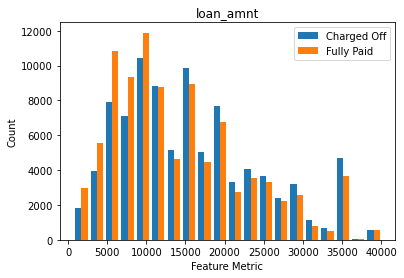

Mean Difference:   Negative --> fully paid is larger
3.140152980498325
Median Difference:
2.7600000000000016


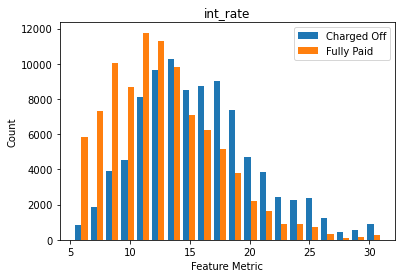

Mean Difference:   Negative --> fully paid is larger
36.17271784744611
Median Difference:
39.36500000000001


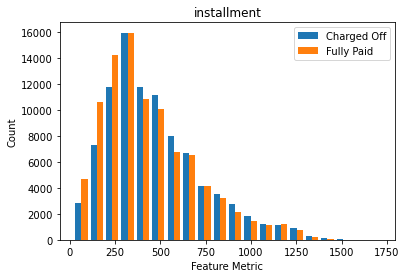

Mean Difference:   Negative --> fully paid is larger
-7044.722271445455
Median Difference:
-6000.0


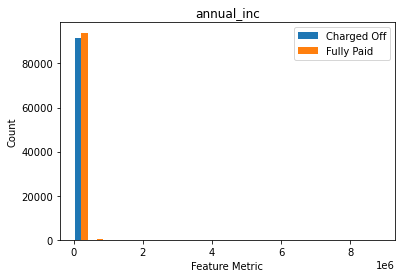

Mean Difference:   Negative --> fully paid is larger
2.3175940717590287
Median Difference:
2.66


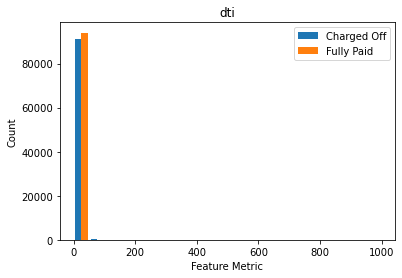

Mean Difference:   Negative --> fully paid is larger
0.038422025545688854
Median Difference:
0.0


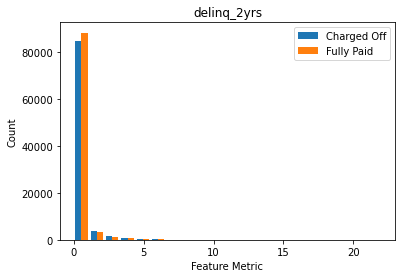

Mean Difference:   Negative --> fully paid is larger
-10.525762951779939
Median Difference:
-10.0


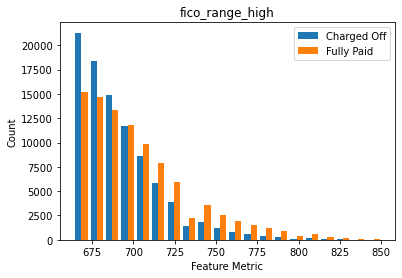

Mean Difference:   Negative --> fully paid is larger
0.16923468979204714
Median Difference:
0.0


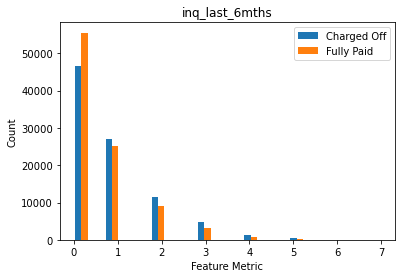

Mean Difference:   Negative --> fully paid is larger
0.5209007096703537
Median Difference:
3.0


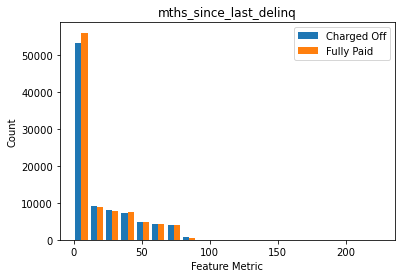

Mean Difference:   Negative --> fully paid is larger
1.9373763884365438
Median Difference:
0.0


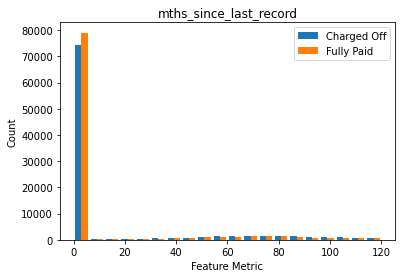

Mean Difference:   Negative --> fully paid is larger
0.4464286855755155
Median Difference:
0.0


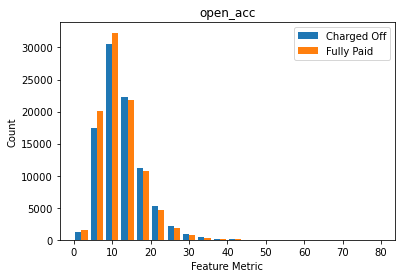

Mean Difference:   Negative --> fully paid is larger
0.037777073495668057
Median Difference:
0.0


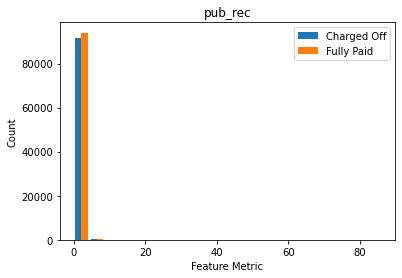

Mean Difference:   Negative --> fully paid is larger
3.6696066404594276
Median Difference:
4.200000000000003


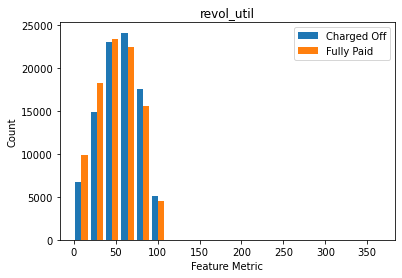

Mean Difference:   Negative --> fully paid is larger
-0.27805213410592344
Median Difference:
0.0


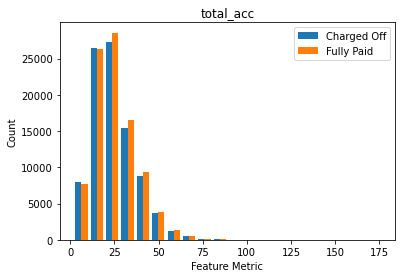

Mean Difference:   Negative --> fully paid is larger
0.005808639977100174
Median Difference:
0.0


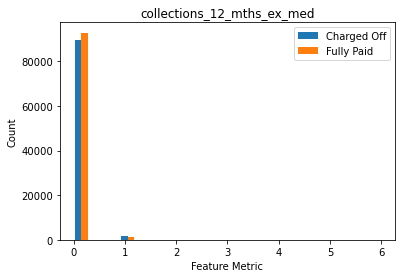

Mean Difference:   Negative --> fully paid is larger
1.3689682521668392
Median Difference:
0.0


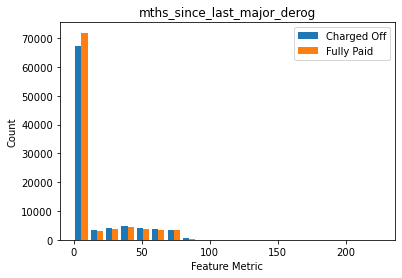

Mean Difference:   Negative --> fully paid is larger
0.0007743360243273557
Median Difference:
0.0


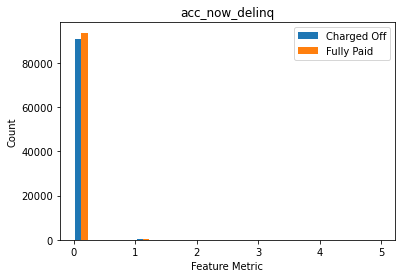

Mean Difference:   Negative --> fully paid is larger
16.23505116486436
Median Difference:
0.0


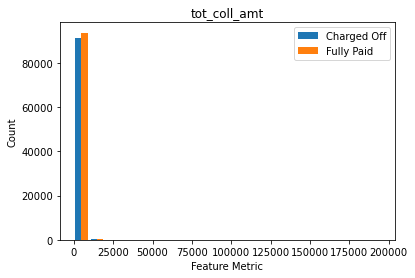

Mean Difference:   Negative --> fully paid is larger
-23736.06577873438
Median Difference:
-18143.0


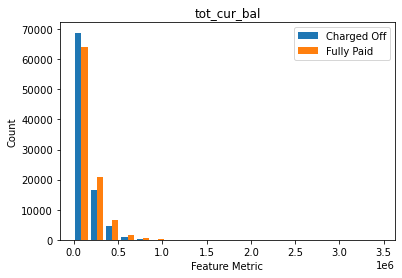

Mean Difference:   Negative --> fully paid is larger
0.13294205123819225
Median Difference:
0.0


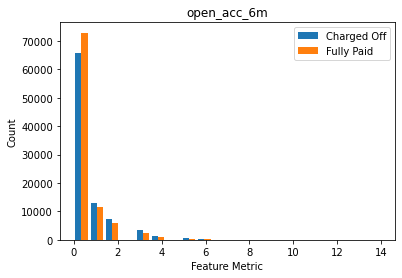

Mean Difference:   Negative --> fully paid is larger
0.2043996523192888
Median Difference:
0.0


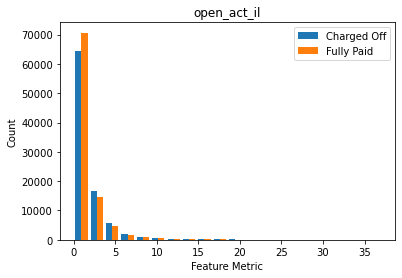

Mean Difference:   Negative --> fully paid is larger
0.09222580806202846
Median Difference:
0.0


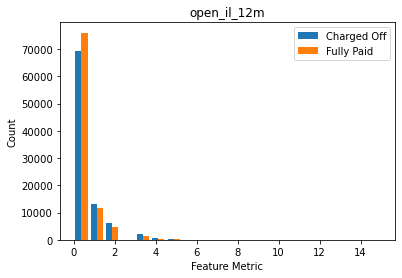

Mean Difference:   Negative --> fully paid is larger
0.17047886356752273
Median Difference:
0.0


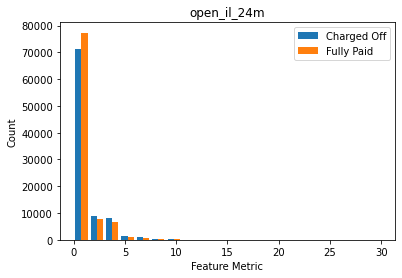

Mean Difference:   Negative --> fully paid is larger
0.286004312494188
Median Difference:
0.0


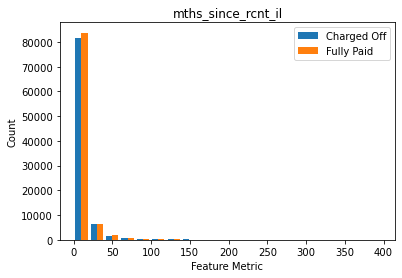

Mean Difference:   Negative --> fully paid is larger
2138.152202395664
Median Difference:
0.0


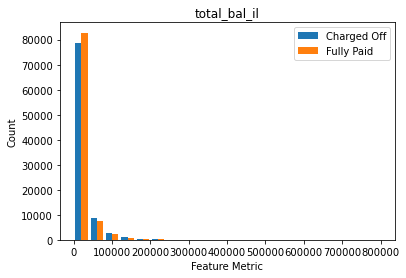

Mean Difference:   Negative --> fully paid is larger
4.839181760561836
Median Difference:
0.0


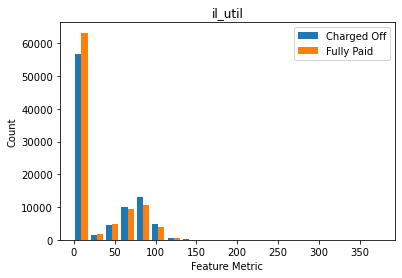

Mean Difference:   Negative --> fully paid is larger
0.1781744802927282
Median Difference:
0.0


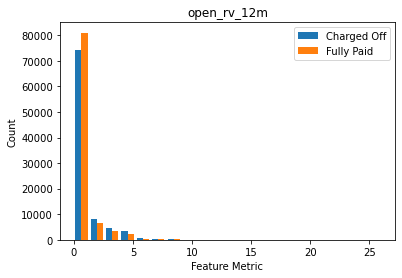

Mean Difference:   Negative --> fully paid is larger
0.39174891776297716
Median Difference:
0.0


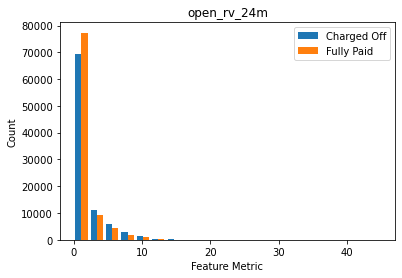

Mean Difference:   Negative --> fully paid is larger
102.3569670227107
Median Difference:
0.0


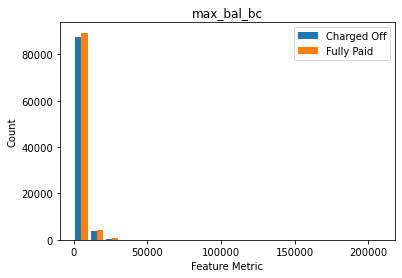

Mean Difference:   Negative --> fully paid is larger
5.174563521436106
Median Difference:
0.0


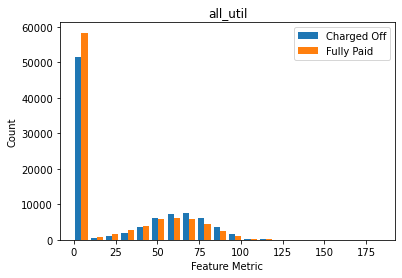

Mean Difference:   Negative --> fully paid is larger
-4024.3830113002077
Median Difference:
-2100.0


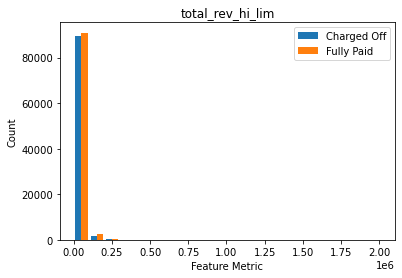

Mean Difference:   Negative --> fully paid is larger
0.12516631535289313
Median Difference:
0.0


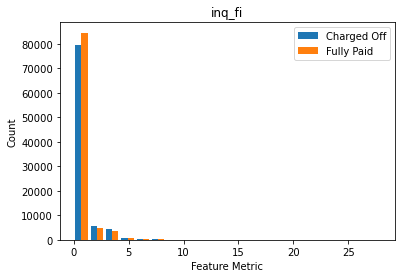

Mean Difference:   Negative --> fully paid is larger
0.04099229878140054
Median Difference:
0.0


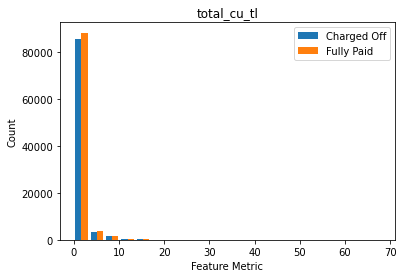

Mean Difference:   Negative --> fully paid is larger
0.28479582953309157
Median Difference:
0.0


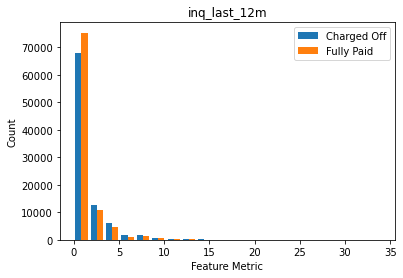

Mean Difference:   Negative --> fully paid is larger
0.8566195457907799
Median Difference:
1.0


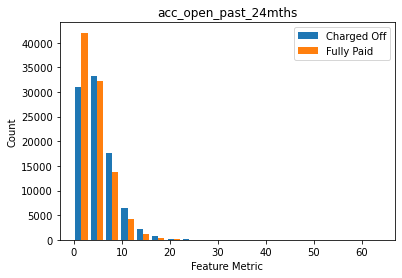

Mean Difference:   Negative --> fully paid is larger
-2795.202485316029
Median Difference:
-1668.5


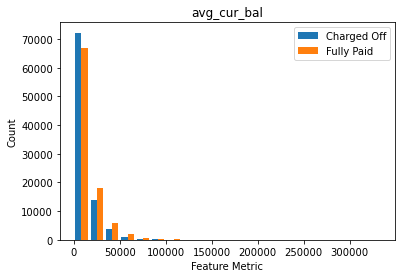

Mean Difference:   Negative --> fully paid is larger
-2909.702484362986
Median Difference:
-1275.0


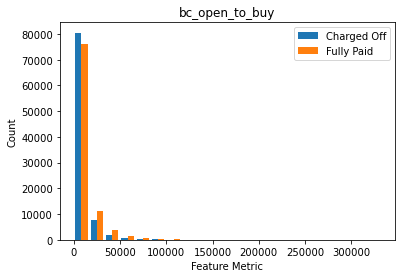

Mean Difference:   Negative --> fully paid is larger
5.386274184919003
Median Difference:
6.999999999999993


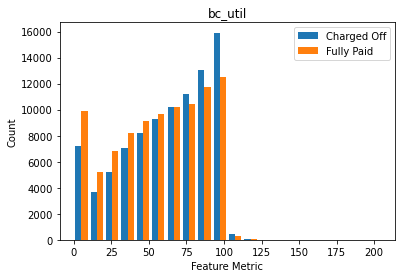

Mean Difference:   Negative --> fully paid is larger
0.0011019914186833832
Median Difference:
0.0


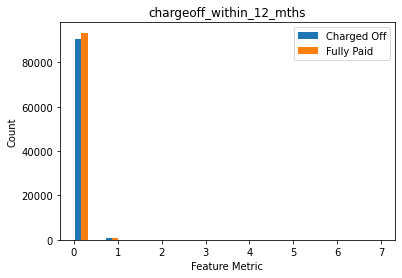

Mean Difference:   Negative --> fully paid is larger
10.494449441589616
Median Difference:
0.0


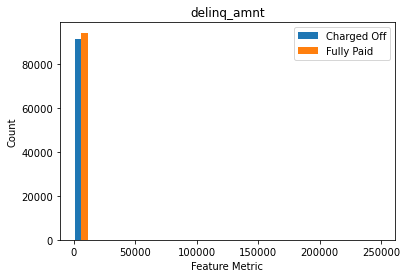

Mean Difference:   Negative --> fully paid is larger
-1.8188937048147977
Median Difference:
-2.0


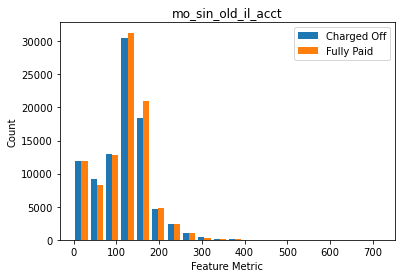

Mean Difference:   Negative --> fully paid is larger
-9.84239314756286
Median Difference:
-11.0


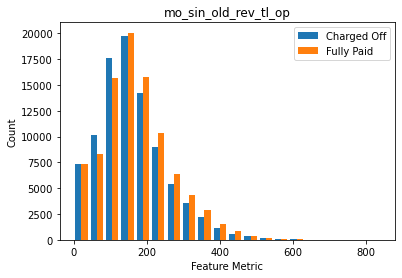

Mean Difference:   Negative --> fully paid is larger
-2.0640228286242532
Median Difference:
-1.0


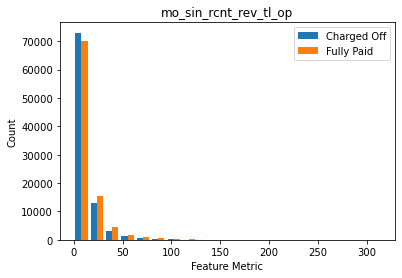

Mean Difference:   Negative --> fully paid is larger
-1.112453961525934
Median Difference:
0.0


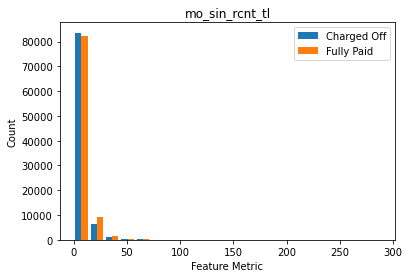

Mean Difference:   Negative --> fully paid is larger
-0.35785855017642754
Median Difference:
0.0


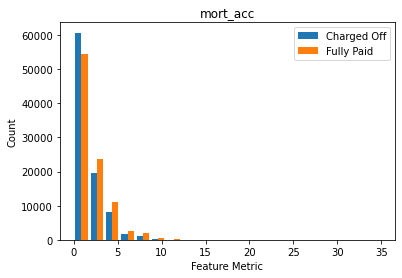

Mean Difference:   Negative --> fully paid is larger
-3.6197613719050388
Median Difference:
-2.0


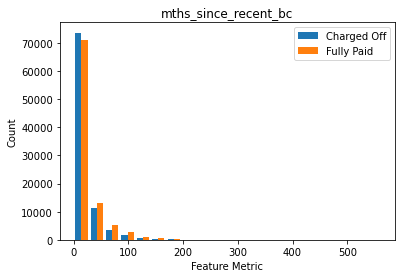

Mean Difference:   Negative --> fully paid is larger
0.43176080476955114
Median Difference:
0.0


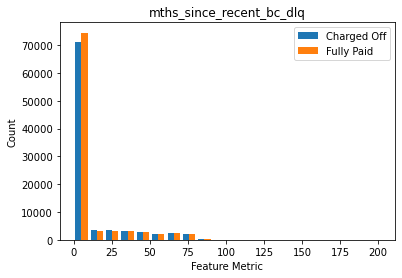

Mean Difference:   Negative --> fully paid is larger
-0.46353240415060437
Median Difference:
0.0


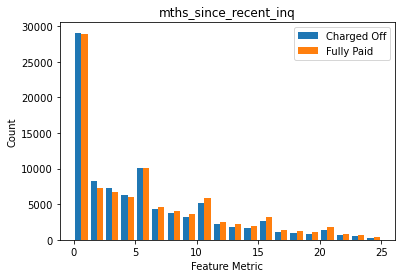

Mean Difference:   Negative --> fully paid is larger
0.3579638091324462
Median Difference:
0.0


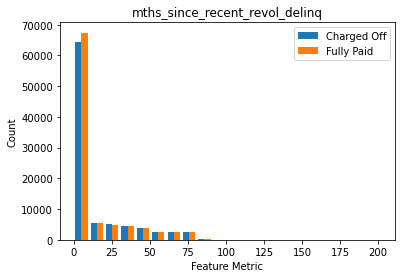

Mean Difference:   Negative --> fully paid is larger
0.041560320475145796
Median Difference:
0.0


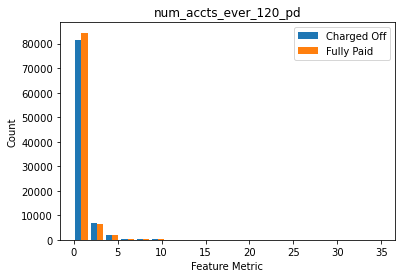

Mean Difference:   Negative --> fully paid is larger
0.2874813729210288
Median Difference:
0.0


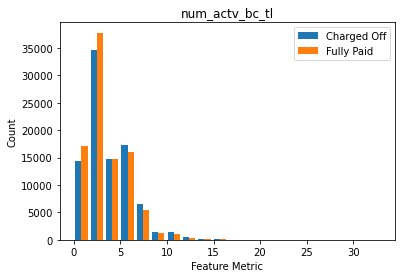

Mean Difference:   Negative --> fully paid is larger
0.6551122523706399
Median Difference:
0.0


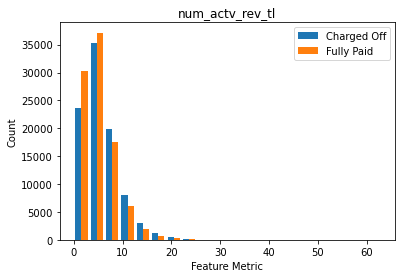

Mean Difference:   Negative --> fully paid is larger
0.17699244862176045
Median Difference:
0.0


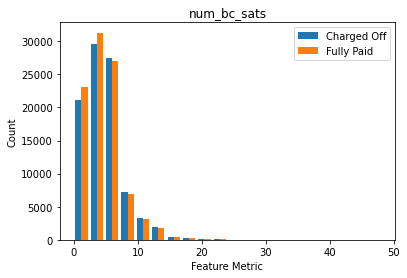

Mean Difference:   Negative --> fully paid is larger
-0.07330748988243663
Median Difference:
0.0


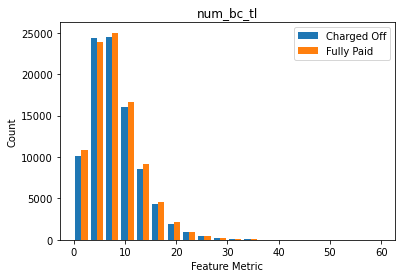

Mean Difference:   Negative --> fully paid is larger
0.30686775203357186
Median Difference:
0.0


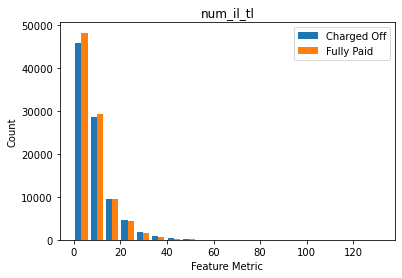

Mean Difference:   Negative --> fully paid is larger
0.49296729021659047
Median Difference:
0.0


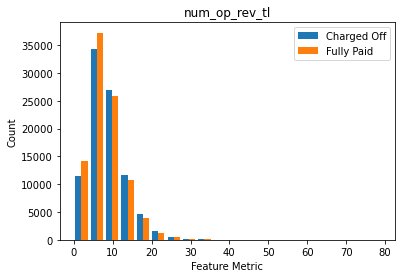

Mean Difference:   Negative --> fully paid is larger
0.12759916170376506
Median Difference:
0.0


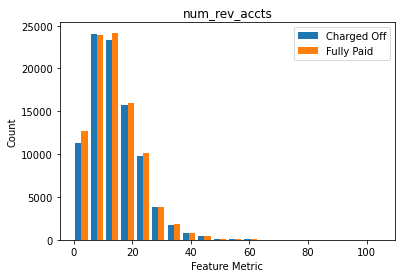

Mean Difference:   Negative --> fully paid is larger
0.6296243243602104
Median Difference:
0.0


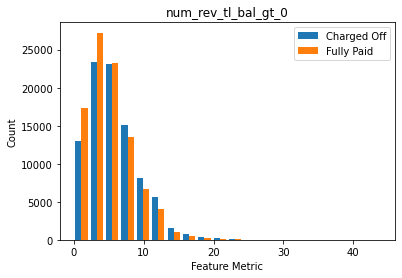

Mean Difference:   Negative --> fully paid is larger
0.5764542546368823
Median Difference:
1.0


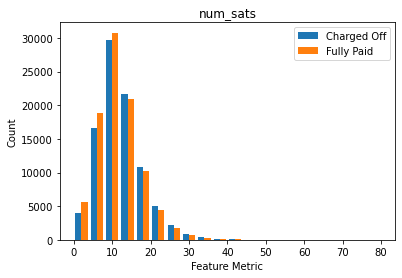

Mean Difference:   Negative --> fully paid is larger
0.000246402978873398
Median Difference:
0.0


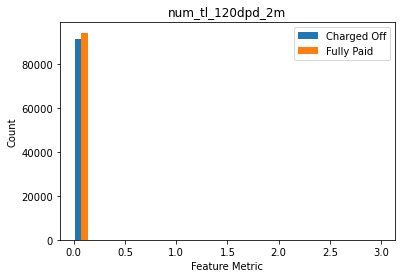

Mean Difference:   Negative --> fully paid is larger
0.0003792569240887167
Median Difference:
0.0


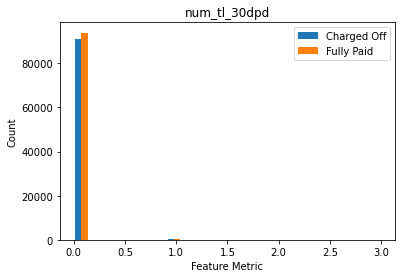

Mean Difference:   Negative --> fully paid is larger
0.012487333123760547
Median Difference:
0.0


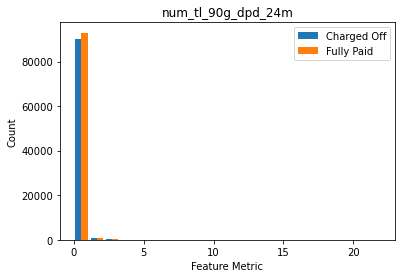

Mean Difference:   Negative --> fully paid is larger
0.4232988522275005
Median Difference:
0.0


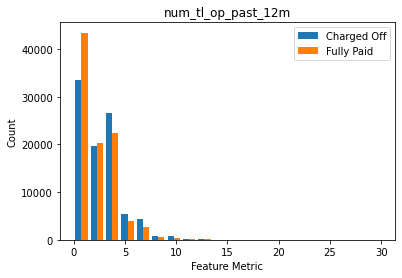

Mean Difference:   Negative --> fully paid is larger
1.1683324959403905
Median Difference:
-0.09999999999999432


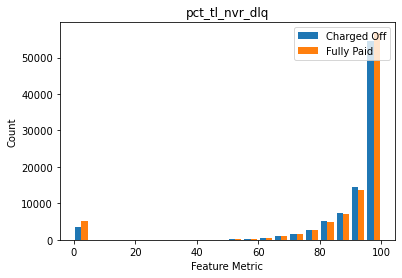

Mean Difference:   Negative --> fully paid is larger
6.570211226651715
Median Difference:
12.5


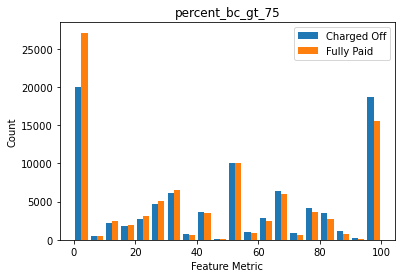

Mean Difference:   Negative --> fully paid is larger
0.021509292646960554
Median Difference:
0.0


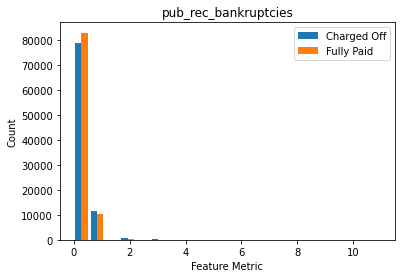

Mean Difference:   Negative --> fully paid is larger
0.011026931876051596
Median Difference:
0.0


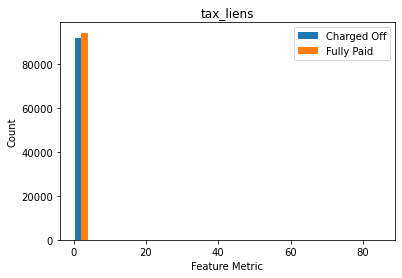

Mean Difference:   Negative --> fully paid is larger
-29729.405357248645
Median Difference:
-24620.5


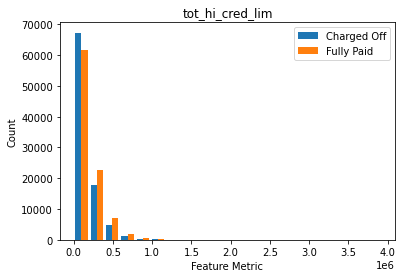

Mean Difference:   Negative --> fully paid is larger
692.323070438928
Median Difference:
1452.0


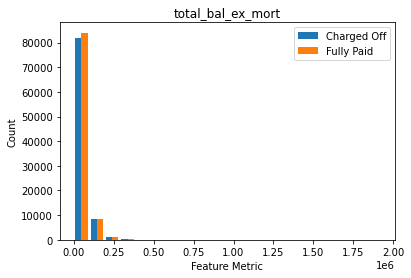

Mean Difference:   Negative --> fully paid is larger
-3482.069232617974
Median Difference:
-2200.0


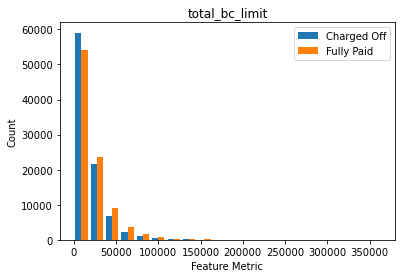

Mean Difference:   Negative --> fully paid is larger
1071.3099776184536
Median Difference:
1611.0


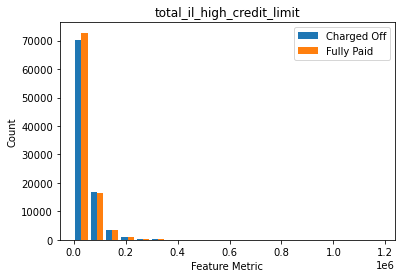

Mean Difference:   Negative --> fully paid is larger
55.7168735748288
Median Difference:
0.0


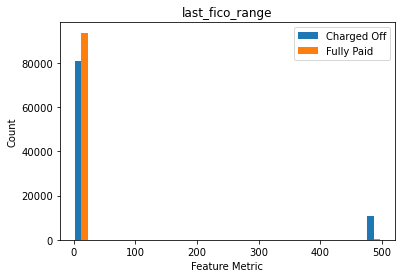

In [16]:
for i in numeric_cols:

    # create x and y data
    x1 = charged_off_df[i]
    X = np.arange(len(x1))
    
    y1 = charged_off_df[i]
    y2 = fully_paid_df[i]

    # data to plot
    n_groups = 10

    # create plot
    fig, ax = plt.subplots(1, 1, 'all')
    bar_width = 0.5
    opacity = 0.8

    # create mean summary
    print('Mean Difference:' + '   Negative --> fully paid is larger')
    print(np.mean(y1) - np.mean(y2))
    print('Median Difference:')
    print(np.median(y1) - np.median(y2))
    
    # create over-layed bar chart
    plt.hist([y1, y2], bins=20, label=['Charged Off', 'Fully Paid'])
    plt.legend(loc='upper right')
    plt.xlabel('Feature Metric')
    plt.ylabel('Count')
    plt.title(str(i))
    plt.show()
    
    

# Object datatype analysis:

In [17]:
object_cols = list(wrangled_data.select_dtypes('object').columns)
object_cols

['term',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'purpose',
 'zip_code',
 'addr_state',
 'earliest_cr_line',
 'initial_list_status',
 'last_credit_pull_d',
 'application_type']

In [18]:
object_cols = ['grade',
 'sub_grade',
 'emp_length',
 'verification_status',
 'purpose',
 'initial_list_status',
 'application_type',
  'term']

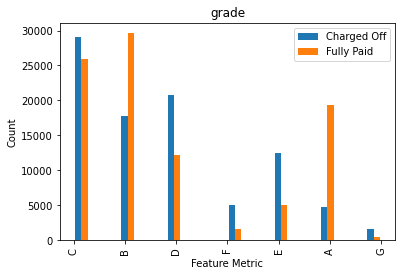

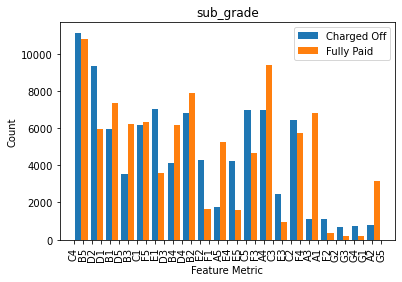

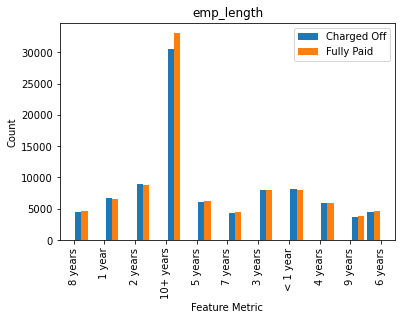

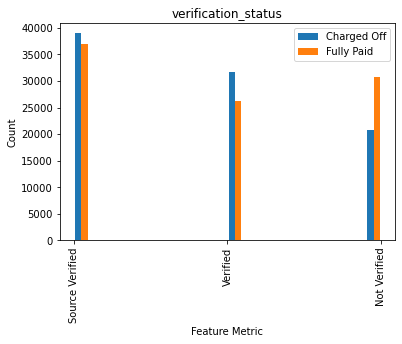

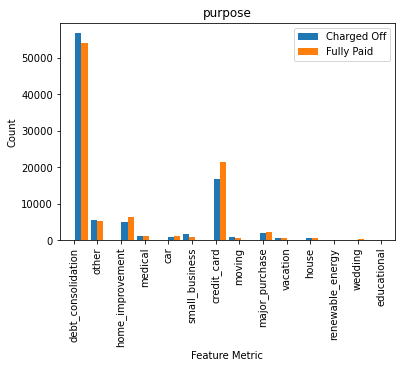

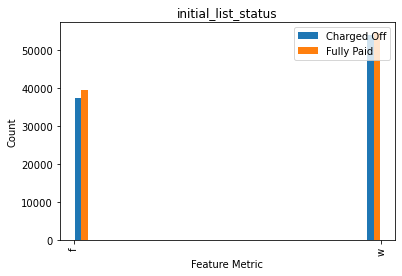

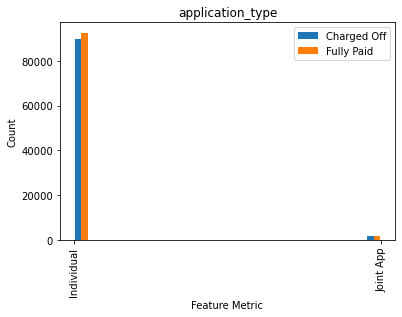

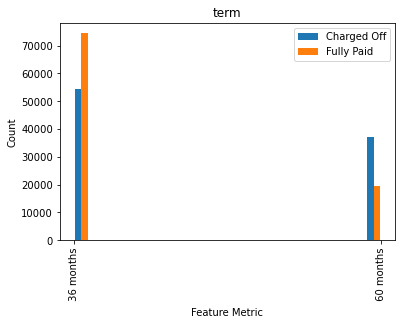

In [21]:
for i in object_cols:

    # create x and y data
    x1 = charged_off_df[i]
    X = np.arange(len(x1))
    
    y1 = charged_off_df[i]
    y2 = fully_paid_df[i]

    # data to plot
    n_groups = 10

    # create plot
    fig, ax = plt.subplots(1, 1, 'all')
    bar_width = 0.5
    opacity = 0.8
    
    # create over-layed bar chart
    plt.hist([y1, y2], bins=20, label=['Charged Off', 'Fully Paid'])
    plt.legend(loc='upper right')
    plt.xlabel('Feature Metric')
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.title(str(i))
    plt.show()


In [22]:
remaining_obj_features = list(np.setdiff1d(object_cols,numeric_cols))
remaining_obj_features

['application_type',
 'emp_length',
 'grade',
 'initial_list_status',
 'purpose',
 'sub_grade',
 'term',
 'verification_status']

# addr_state:

In [23]:
paid = list(fully_paid_df['addr_state'].unique())

paid.sort()


In [24]:
len(fully_paid_df['addr_state'].value_counts())

50

In [25]:
charged = list(charged_off_df['addr_state'].unique())

charged.sort()


In [26]:
len(charged_off_df['addr_state'].value_counts())

51

In [27]:
additional_state = list(np.setdiff1d(paid,charged))

additional_state

[]

In [28]:
# there is an additional state in Fully Paid. Investigate

# DC is added as a state which brings the total to 51
# IA is not in the charged off list


In [29]:
charged_off = pd.DataFrame(charged_off_df.groupby(by='addr_state')['loan_status'].count().reset_index().values, columns=['addr_state', 'Charged Off Count'])
charged_off

,addr_state,Charged Off Count
0,AK,224
1,AL,1297
2,AR,797
3,AZ,2043
4,CA,13248
5,CO,1576
6,CT,1151
7,DC,151
8,DE,247
9,FL,6898


In [30]:
# add IA with count 0

new_row = {'addr_state':'IA', 'Charged Off Count':0}

#append row to the dataframe
charged_off = charged_off.append(new_row, ignore_index=True)

charged_off

,addr_state,Charged Off Count
0,AK,224
1,AL,1297
2,AR,797
3,AZ,2043
4,CA,13248
5,CO,1576
6,CT,1151
7,DC,151
8,DE,247
9,FL,6898


In [31]:
fully_paid = pd.DataFrame(fully_paid_df.groupby(by='addr_state')['loan_status'].count().reset_index().values, columns=['addr_state', 'Fully Paid Count'])
fully_paid

,addr_state,Fully Paid Count
0,AK,233
1,AL,1074
2,AR,652
3,AZ,2223
4,CA,14043
5,CO,2203
6,CT,1433
7,DC,272
8,DE,262
9,FL,6385


In [32]:
address_df = pd.merge(fully_paid, charged_off, on = 'addr_state', how = 'inner')

address_df

,addr_state,Fully Paid Count,Charged Off Count
0,AK,233,224
1,AL,1074,1297
2,AR,652,797
3,AZ,2223,2043
4,CA,14043,13248
5,CO,2203,1576
6,CT,1433,1151
7,DC,272,151
8,DE,262,247
9,FL,6385,6898


In [33]:
address_df['Percent Paid'] = address_df['Fully Paid Count'] / (address_df['Fully Paid Count'] + address_df['Charged Off Count'])

address_df.sort_values(by='Percent Paid', inplace=True, ascending=False)

address_df

,addr_state,Fully Paid Count,Charged Off Count,Percent Paid
45,VT,198,109,0.644951
20,ME,159,88,0.643725
7,DC,272,151,0.643026
36,OR,1181,796,0.59737
29,NH,461,313,0.595607
39,SC,1198,840,0.587831
5,CO,2203,1576,0.582958
46,WA,2117,1526,0.581114
48,WV,327,244,0.57268
25,MT,286,225,0.559687


In [34]:
# this shows which states pay back their loans. Good to know. 

# home_ownership

In [35]:
fully_paid = pd.DataFrame(fully_paid_df.groupby(by='home_ownership')['loan_status'].count().reset_index().values, columns=['home_ownership', 'Fully Paid Count'])
fully_paid

,home_ownership,Fully Paid Count
0,ANY,14
1,MORTGAGE,48295
2,NONE,1
3,OTHER,10
4,OWN,9517
5,RENT,36310


In [36]:
charged_off = pd.DataFrame(charged_off_df.groupby(by='home_ownership')['loan_status'].count().reset_index().values, columns=['home_ownership', 'Charged Off Count'])
charged_off

,home_ownership,Charged Off Count
0,ANY,19
1,MORTGAGE,38942
2,NONE,1
3,OTHER,10
4,OWN,9486
5,RENT,43076


In [37]:
ownership_df = pd.merge(fully_paid, charged_off, on = 'home_ownership', how = 'inner')

ownership_df

,home_ownership,Fully Paid Count,Charged Off Count
0,ANY,14,19
1,MORTGAGE,48295,38942
2,NONE,1,1
3,OTHER,10,10
4,OWN,9517,9486
5,RENT,36310,43076


In [38]:
ownership_df['Percent Paid'] = ownership_df['Fully Paid Count'] / (ownership_df['Fully Paid Count'] + ownership_df['Charged Off Count'])

ownership_df.sort_values(by='Percent Paid', inplace=True, ascending=False)

ownership_df

,home_ownership,Fully Paid Count,Charged Off Count,Percent Paid
1,MORTGAGE,48295,38942,0.553607
4,OWN,9517,9486,0.500816
2,NONE,1,1,0.5
3,OTHER,10,10,0.5
5,RENT,36310,43076,0.457385
0,ANY,14,19,0.424242


In [39]:
# there is a slight difference between mortage and renting
# suprisingly owning is worse at paying off than with a mortage!

# 'emp_title'

In [40]:
# there are a lot of job titles. Sort by

emp_list = list(wrangled_data['emp_title'].head(100))



In [41]:
# I want to know if any emplyment titles are overwelmingly one sided (fully paid or charged off)

In [42]:
d = pd.DataFrame()

for i in emp_list:
    temp = pd.DataFrame(
        {
            'Employment Title': i,
            'Fully Paid Count': fully_paid_df[['emp_title']].eq(i).sum(),
            'Charged Off Count': charged_off_df[['emp_title']].eq(i).sum()
        }
    )
    
    d = pd.concat([d, temp])
    
d.set_index('Employment Title')


,Fully Paid Count,Charged Off Count
Employment Title,,
Chief Petty Officer,4,4
Finisher,3,3
Manager,1377,1528
Senior Regional Managet,1,0
Technician,172,198
Project Manager,464,375
Project Manager,464,375
Food and beverage,2,1
Table Games Dealer,12,15


In [43]:
d['Percent Paid'] = d['Fully Paid Count'] / (d['Fully Paid Count'] + d['Charged Off Count'])

d.sort_values(by='Percent Paid', inplace=True)

d

,Employment Title,Fully Paid Count,Charged Off Count,Percent Paid
emp_title,new york state,1,2,0.333333
emp_title,Server,134,213,0.386167
emp_title,driver,231,363,0.388889
emp_title,Leasing Consultant,4,6,0.400000
emp_title,Laborer,67,98,0.406061
emp_title,Driver,533,767,0.410000
emp_title,Driver,533,767,0.410000
emp_title,Owner,735,998,0.424120
emp_title,Operator,106,142,0.427419
emp_title,Radiology Technologist,3,4,0.428571


In [44]:
# no real correlation here. remove.

del wrangled_data['emp_title']

# Zip Code

In [45]:
# remove zip code - geographic trends will be covered by state

del wrangled_data['zip_code']

# Estimating loan maturity (length)

In [46]:
# loan maturity will take the place of earliest credit line and last credit pulled

wrangled_data['earliest_cr_line']

Loan ID
209210     Aug-1999
1781710    Aug-1991
536392     Mar-1999
1195051    Apr-2009
1250305    Dec-1983
             ...   
672009     Dec-2003
1753526    Apr-2003
932206     Feb-1996
1129388    Jun-2010
1613297    Feb-2004
Name: earliest_cr_line, Length: 185681, dtype: object

In [47]:
# convert to year
from datetime import datetime, timedelta

wrangled_data['earliest_cr_line'] = pd.to_datetime(wrangled_data['earliest_cr_line'])
wrangled_data['credit_maturity'] = (datetime.now() - wrangled_data['earliest_cr_line']).dt.days


In [ ]:
wrangled_data['credit_maturity']

In [ ]:
wrangled_data.shape

In [ ]:
del wrangled_data['earliest_cr_line']

del wrangled_data['last_credit_pull_d']

In [ ]:
wrangled_data.shape

In [ ]:
# no rows were removed. 3 columns were removed

# All columns show usable information. Some are more useful than others. Modeling will provide insight.

In [ ]:
wrangled_data.to_csv('EDA_second_capstone_50_50.csv', index=True)